In [3]:
import tensorflow as tf 
from tensorflow.keras import datasets , layers , models 
import numpy as np 
import matplotlib.pyplot as plt 

LOADING DATA

In [2]:
(x_train , y_train) , (x_test ,y_test) = datasets.cifar10.load_data()

In [3]:
print(x_train.shape ,y_train.shape )
print(x_test.shape ,y_test.shape )

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


| Label Index | Class       |
|-------------|-------------|
| 0           | airplane    |
| 1           | automobile  |
| 2           | bird        |
| 3           | cat         |
| 4           | deer        |
| 5           | dog         |
| 6           | frog        |
| 7           | horse       |
| 8           | ship        |
| 9           | truck       |


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

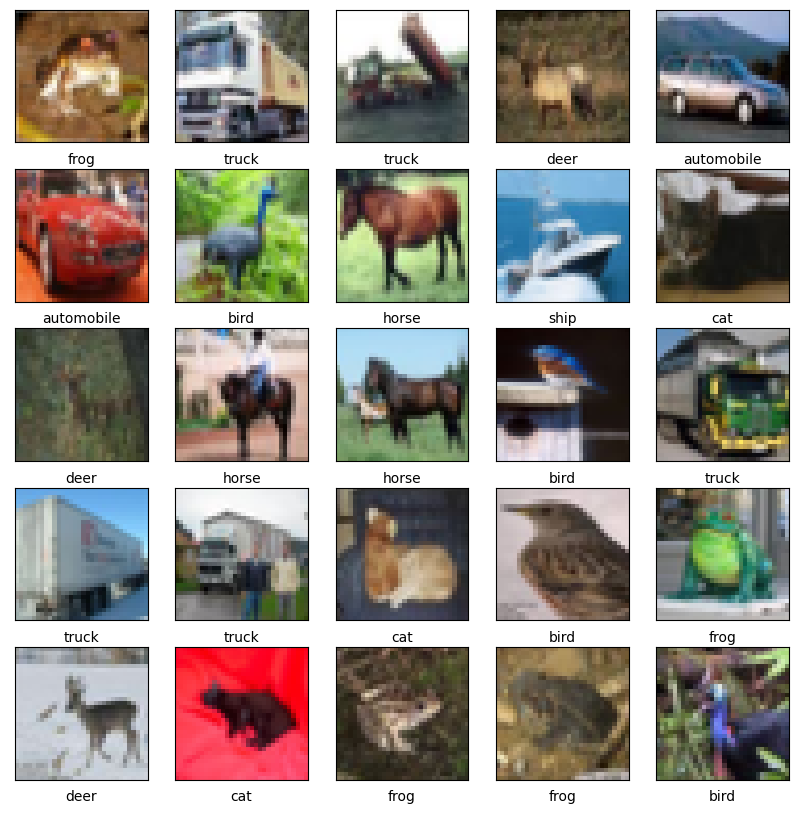

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
#Normalization
x_train = x_train/255
x_test =  x_test/255

CONVNET

In [4]:
from keras import regularizers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(3,3) , activation = 'relu'))
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(layers.Dropout(0.25))
# model.add(layers.Dense(32 , activation = 'relu', kernel_regularizer=regularizers.L1L2(0.01 , 0.01)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(10 , activation = 'softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [8]:
def adjust_learning_rate(x_train , y_train , batch_size):
    
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
        
    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum =0.9)
    
    # Compile the model passing in the appropriate loss

    model.compile(optimizer = tf.keras.optimizers.SGD( momentum= 0.9) ,
              loss = "sparse_categorical_crossentropy" , 
              metrics = ['accuracy'] )
    
    
    history = model.fit(x_train, y_train  ,  epochs=50, callbacks=[lr_schedule] , batch_size= batch_size)
    
    return history

In [12]:
lr_history = adjust_learning_rate(x_train , y_train , 64 )

Epoch 1/50
782/782 [==============================] - 70s 88ms/step - loss: 3.4098 - accuracy: 0.2283 - lr: 1.0000e-04
Epoch 2/50
782/782 [==============================] - 75s 96ms/step - loss: 3.3093 - accuracy: 0.2491 - lr: 1.1220e-04
Epoch 3/50
782/782 [==============================] - 69s 88ms/step - loss: 3.1795 - accuracy: 0.2682 - lr: 1.2589e-04
Epoch 4/50
782/782 [==============================] - 68s 87ms/step - loss: 3.0626 - accuracy: 0.2833 - lr: 1.4125e-04
Epoch 5/50
782/782 [==============================] - 70s 89ms/step - loss: 2.9702 - accuracy: 0.3003 - lr: 1.5849e-04
Epoch 6/50
782/782 [==============================] - 71s 91ms/step - loss: 2.8862 - accuracy: 0.3172 - lr: 1.7783e-04
Epoch 7/50
782/782 [==============================] - 79s 100ms/step - loss: 2.7976 - accuracy: 0.3330 - lr: 1.9953e-04
Epoch 8/50
782/782 [==============================] - 73s 94ms/step - loss: 2.6983 - accuracy: 0.3526 - lr: 2.2387e-04
Epoch 9/50
782/782 [===========================

(0.0001, 0.1, 0.0, 4.0)

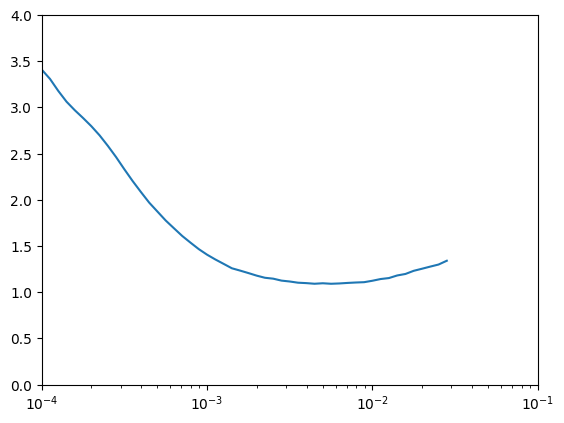

In [15]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 1e-1, 0, 4])

In [9]:
# used learning rate of the steepest descent
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 2e-3 , momentum= 0.9) ,
              loss = "sparse_categorical_crossentropy" , 
              metrics = ['accuracy'] )

In [10]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop] , batch_size = 64)

Epoch 1/50
782/782 [==============================] - 113s 140ms/step - loss: 3.0203 - accuracy: 0.2271 - val_loss: 2.6034 - val_accuracy: 0.3021
Epoch 2/50
782/782 [==============================] - 116s 148ms/step - loss: 2.2659 - accuracy: 0.3632 - val_loss: 2.0423 - val_accuracy: 0.4027
Epoch 3/50
782/782 [==============================] - 130s 166ms/step - loss: 1.8811 - accuracy: 0.4242 - val_loss: 1.7317 - val_accuracy: 0.4554
Epoch 4/50
782/782 [==============================] - 120s 154ms/step - loss: 1.6506 - accuracy: 0.4702 - val_loss: 1.6108 - val_accuracy: 0.4784
Epoch 5/50
782/782 [==============================] - 119s 152ms/step - loss: 1.5098 - accuracy: 0.5006 - val_loss: 1.4270 - val_accuracy: 0.5236
Epoch 6/50
782/782 [==============================] - 116s 148ms/step - loss: 1.4120 - accuracy: 0.5299 - val_loss: 1.3467 - val_accuracy: 0.5560
Epoch 7/50
782/782 [==============================] - 127s 162ms/step - loss: 1.3448 - accuracy: 0.5492 - val_loss: 1.2955 -

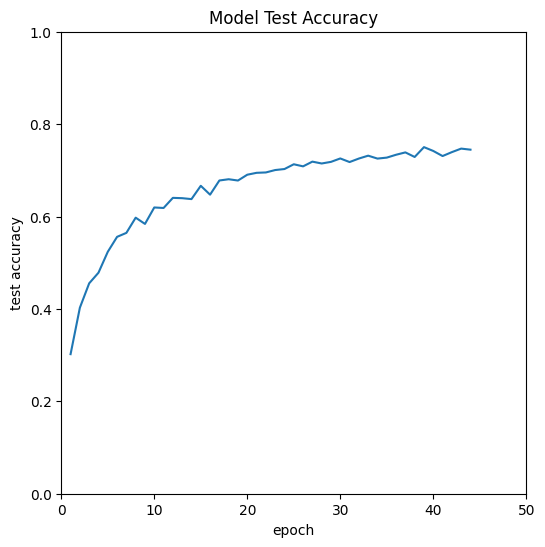

In [22]:
#visualization
plt.figure(figsize=(6 , 6))
epochs = range(1, len(history.history['val_accuracy']) + 1)
plt.plot(epochs, history.history['val_accuracy'])
plt.xlim(0 , 50)
plt.ylim(0 , 1)
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('Model Test Accuracy')
plt.show()

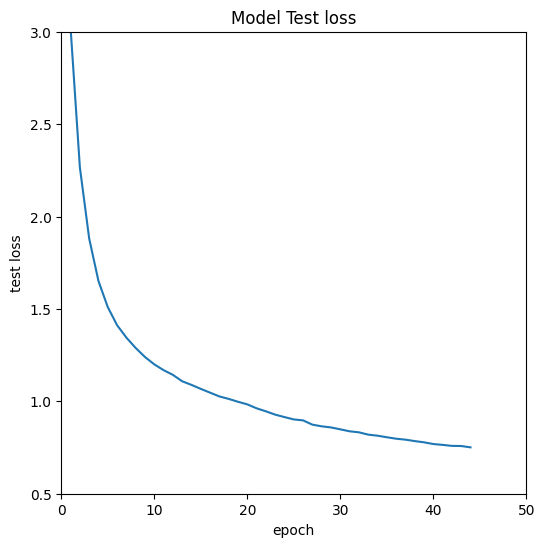

In [24]:
#visualization
plt.figure(figsize=(6 , 6))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.xlim(0 , 50)
plt.ylim(0.5 , 3)
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.title('Model Test loss')
plt.show()

Predictions

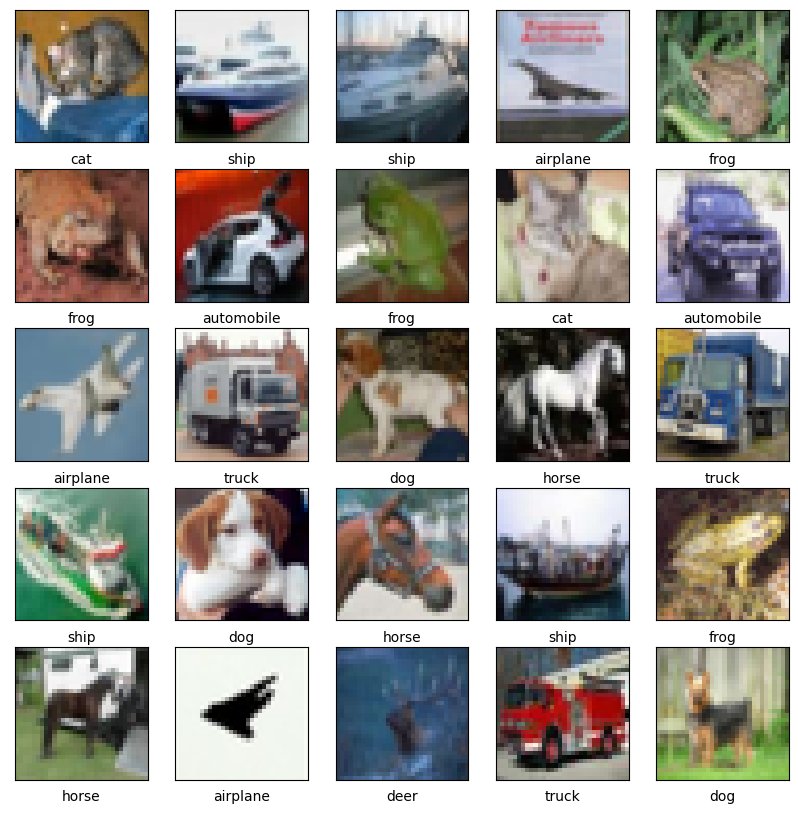

In [25]:
#actual
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

1/1 [==============================] - 0s 31ms/step


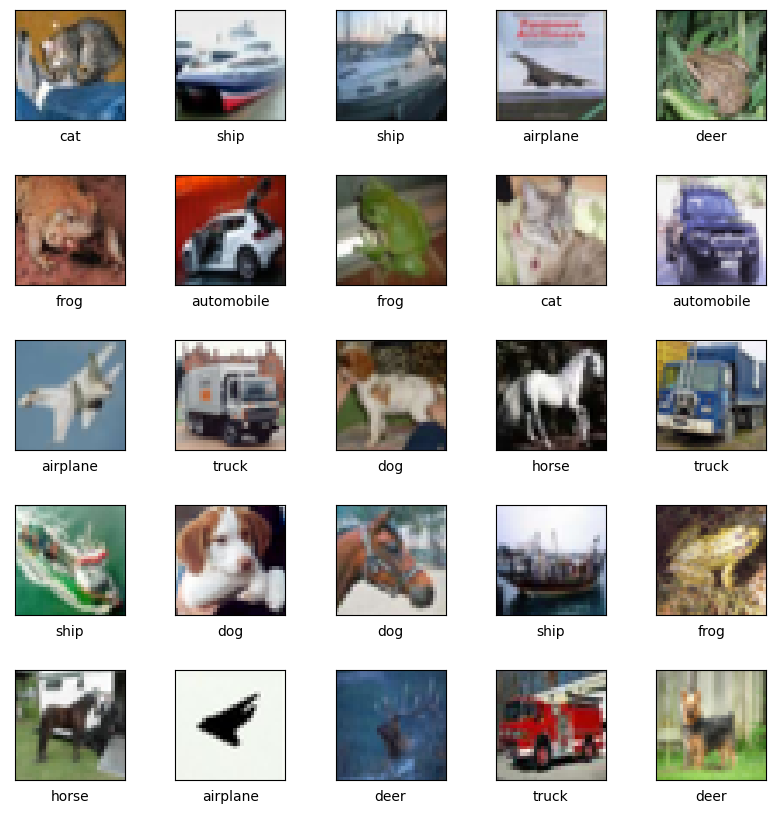

In [31]:
#prediction

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Loop through each subplot
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(x_test[i], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    img = np.expand_dims(x_test[i], axis=0)

    prediction = model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]

    ax.set_xlabel(predicted_class)

# Display the plot
plt.show()


1/1 [==============================] - 0s 24ms/step


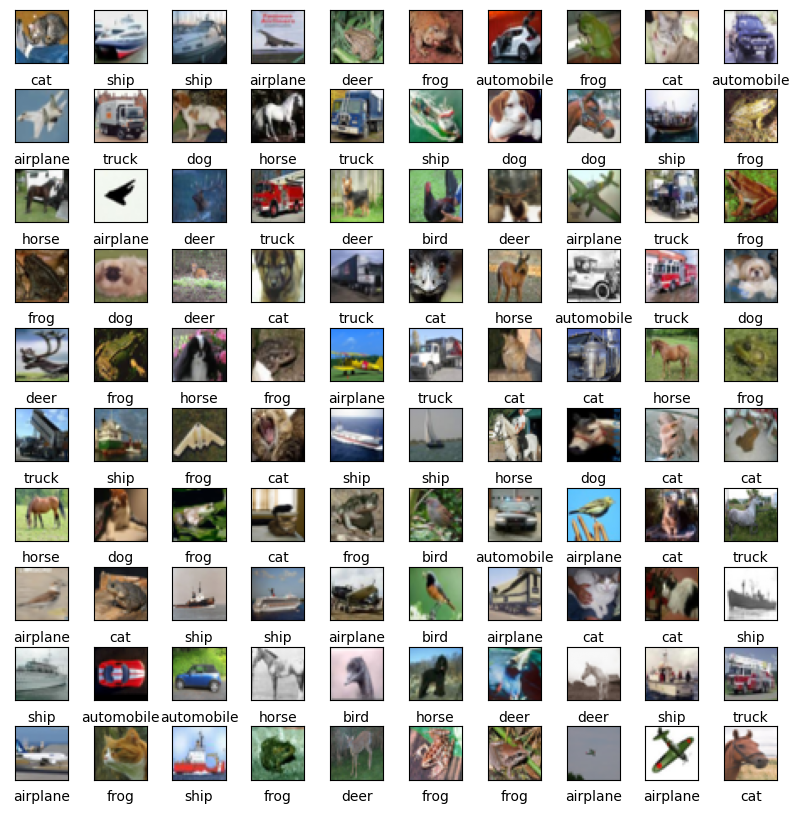

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a 5x5 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Loop through each subplot
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(x_test[i], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    img = np.expand_dims(x_test[i], axis=0)

    prediction = model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]

    ax.set_xlabel(predicted_class)

# Display the plot
plt.show()